# Optimization (Simple version, No convolution)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math

To understand the optimitzation, we will try the guess recreate the 2-focus images (without any convolution)

In [2]:
# Define function to minimize
def sources(dist):
    sx = 600   #len(x0[0])
    sy = 400   #len(x0)
    output=np.zeros((sy,sx), dtype=int) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

In [3]:
# Import image (x0(t))
x0 = mpimg.imread('images/focus001.png')
x0 = x0[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.

In [6]:
# Optimization

norma_min = 1000
i_min_start = 1000
i_min_end = 1000

d_array=np.array([],dtype=float) #To make a plot, we initialize this np.array for the x-axis
norm_array=np.array([],dtype=float) #To make a plot, we initialize this np.array for the y-axis
for i in range(1,300):
    norma=sum(sum(abs(x0-sources(i))))
    if norma<=norma_min:
        i_min_end=i
    if norma<norma_min:
        norma_min=norma
        i_min_start=i
    print(i,i_min_start,i_min_end,norma,norma_min)
    d_array=np.insert(d_array,len(d_array),i)
    norm_array=np.insert(norm_array,len(norm_array),norma)
    
i_min=math.floor((i_min_start+i_min_end)/2)
print("d mínima = ",i_min,[i_min_start,i_min_end])

1 1 1 70.7098051616922 70.7098051616922
2 1 2 70.7098051616922 70.7098051616922
3 1 3 70.7098051616922 70.7098051616922
4 1 4 70.7098051616922 70.7098051616922
5 1 5 70.7098051616922 70.7098051616922
6 1 6 70.7098051616922 70.7098051616922
7 1 7 70.7098051616922 70.7098051616922
8 1 8 70.7098051616922 70.7098051616922
9 1 9 70.7098051616922 70.7098051616922
10 1 10 70.7098051616922 70.7098051616922
11 1 11 70.7098051616922 70.7098051616922
12 1 12 70.7098051616922 70.7098051616922
13 1 13 70.7098051616922 70.7098051616922
14 1 14 70.7098051616922 70.7098051616922
15 1 15 70.7098051616922 70.7098051616922
16 1 16 70.7098051616922 70.7098051616922
17 1 17 70.7098051616922 70.7098051616922
18 1 18 70.7098051616922 70.7098051616922
19 1 19 70.7098051616922 70.7098051616922
20 1 20 70.7098051616922 70.7098051616922
21 1 21 70.7098051616922 70.7098051616922
22 1 22 70.7098051616922 70.7098051616922
23 1 23 70.7098051616922 70.7098051616922
24 1 24 70.7098051616922 70.7098051616922
25 1 25 70

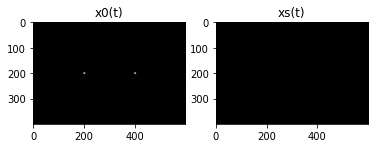

In [5]:
# Find xs
xs=sources(i_min_start)

# Plotting
fig = plt.figure()

ax = fig.add_subplot(1, 2, 1)
plt.imshow(x0, cmap='gray')
plt.title('x0(t)')

ax = fig.add_subplot(1, 2, 2)
plt.imshow(xs, cmap='gray')
plt.title('xs(t)')

plt.show()

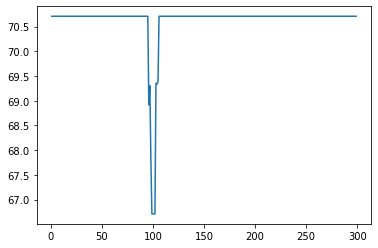

In [7]:
plt.plot(d_array,norm_array)
plt.show()